## We will make use of the sms spam classification data for the implementation

**Data processing**
*   Import the required packages
*   Load the data into train and test variables
*   Remove the unwanted data columns
*   Build wordcloud to see which message is spam and which is not.
*   Remove the stop words and punctuations
*   Convert the text data into vectors

**Building a classification model**
*   Split the data into train and test sets
*   Use Sklearn built in classifiers to build the models
*   Train the data on the model
*   Make predictions on new data

## Import the required packages

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import csv
import sklearn
import pickle
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import GridSearchCV,train_test_split,StratifiedKFold,cross_val_score,learning_curve

## Preprocessing and Exploring the Dataset

The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged according to being ham (legitimate) or spam.


The data was obtained from UCI’s Machine Learning Repository, alternatively
https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection

In [117]:
url = 'https://raw.githubusercontent.com/giandopal/Artificial-Intelligence-with-Python/main/data/spam.csv'

data = pd.read_csv(url, encoding='latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [118]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


## Removing unwanted columns

In [119]:
data = data.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
data = data.rename(columns={"v2" : "text", "v1":"label"})

In [120]:
data[1990:2000]

,label,text
1990,ham,HI DARLIN IVE JUST GOT BACK AND I HAD A REALLY...
1991,ham,No other Valentines huh? The proof is on your ...
1992,spam,Free tones Hope you enjoyed your new content. ...
1993,ham,Eh den sat u book e kb liao huh...
1994,ham,Have you been practising your curtsey?
1995,ham,Shall i come to get pickle
1996,ham,Lol boo I was hoping for a laugh
1997,ham,\YEH I AM DEF UP4 SOMETHING SAT
1998,ham,"Well, I have to leave for my class babe ... Yo..."
1999,ham,LMAO where's your fish memory when I need it?


In [121]:
data['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [7]:
# Import nltk packages 
import nltk

## Natural Language Toolkit
NLTK is a leading platform for building Python programs to work with human language data. It provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, along with a suite of text processing libraries for classification, tokenization, stemming, tagging, parsing, and semantic reasoning, wrappers for industrial-strength NLP libraries, and an active discussion forum.

In [113]:
#nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [116]:
sentence = """At eight o'clock on Thursday morning... Arthur didn't feel very good."""
tokens = nltk.word_tokenize(sentence)
tokens
['At', 'eight', "o'clock", 'on', 'Thursday', 'morning','Arthur', 'did', "n't", 'feel', 'very', 'good', '.']
tagged = nltk.pos_tag(tokens)
tagged[0:6]


[('At', 'IN'),
 ('eight', 'CD'),
 ("o'clock", 'NN'),
 ('on', 'IN'),
 ('Thursday', 'NNP'),
 ('morning', 'NN')]

In [ ]:
#! pip install svgling


In [40]:
entities = nltk.chunk.ne_chunk(tagged)
entities

NameError: name 'tagged' is not defined

In [120]:
from nltk.corpus import treebank
t = treebank.parsed_sents('wsj_0001.mrg')[0]
t.draw()

here are all the tags in the Penn Treebank tagset used by NLTK:

    CC: coordinating conjunction
    CD: cardinal number
    DT: determiner
    EX: existential there
    FW: foreign word
    IN: preposition or subordinating conjunction
    JJ: adjective
    JJR: adjective, comparative
    JJS: adjective, superlative
    LS: list marker
    MD: modal auxiliary
    NN: noun, singular or mass
    NNS: noun, plural
    NNP: proper noun, singular
    NNPS: proper noun, plural
    PDT: predeterminer
    POS: possessive ending
    PRP: personal pronoun
    PRP \$: possessive pronoun
    RB: adverb
    RBR: adverb, comparative
    RBS: adverb, superlative
    RP: particle
    SYM: symbol
    TO: to
    UH: interjection
    VB: verb, base form
    VBD: verb, past tense
    VBG: verb, gerund or present participle
    VBN: verb, past participle
    VBP: verb, non-3rd person singular present
    VBZ: verb, 3rd person singular present
    WDT: wh-determiner
    WP: wh-pronoun
    WP$: possessive wh-pronoun
    WRB: wh-adverb

In [16]:
# Import Punkt Tokenizer Models
nltk.download("punkt")
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /home/giando/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## WordClouds- to see which words are common in SPAM and NOT SPAM messages

In [17]:
ham_words = ''
spam_words = ''

In [23]:
data

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [45]:
data[data['label'] == 'spam'].text

2       Free entry in 2 a wkly comp to win FA Cup fina...
5       FreeMsg Hey there darling it's been 3 week's n...
8       WINNER!! As a valued network customer you have...
9       Had your mobile 11 months or more? U R entitle...
11      SIX chances to win CASH! From 100 to 20,000 po...
                              ...                        
5537    Want explicit SEX in 30 secs? Ring 02073162414...
5540    ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547    Had your contract mobile 11 Mnths? Latest Moto...
5566    REMINDER FROM O2: To get 2.50 pounds free call...
5567    This is the 2nd time we have tried 2 contact u...
Name: text, Length: 747, dtype: object

In [89]:
# Creating a corpus of spam messages
for val in data[data['label'] == 'spam'].text:
    text = val.lower()
    tokens = nltk.word_tokenize(text)
    for words in tokens:
        spam_words = spam_words + words + ' '

# Creating a corpus of ham messages
for val in data[data['label'] == 'ham'].text:
    text = text.lower()
    tokens = nltk.word_tokenize(text)
    for words in tokens:
        ham_words = ham_words + words + ' '

NameError: name 'spam_words' is not defined

In [26]:
type(spam_words)

str

In [27]:
spam_words

"free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005. text fa to 87121 to receive entry question ( std txt rate ) t & c 's apply 08452810075over18 's freemsg hey there darling it 's been 3 week 's now and no word back ! i 'd like some fun you up for it still ? tb ok ! xxx std chgs to send , å£1.50 to rcv winner ! ! as a valued network customer you have been selected to receivea å£900 prize reward ! to claim call 09061701461. claim code kl341 . valid 12 hours only . had your mobile 11 months or more ? u r entitled to update to the latest colour mobiles with camera for free ! call the mobile update co free on 08002986030 six chances to win cash ! from 100 to 20,000 pounds txt > csh11 and send to 87575. cost 150p/day , 6days , 16+ tsandcs apply reply hl 4 info urgent ! you have won a 1 week free membership in our å£100,000 prize jackpot ! txt the word : claim to no : 81010 t & c www.dbuk.net lccltd pobox 4403ldnw1a7rw18 xxxmobilemovieclub : to use your credit , click the wa

## Creating Spam wordcloud and ham wordcloud

A tag cloud (also known as a word cloud, wordle or weighted list in visual design) is a visual representation of text data, which is often used to depict keyword metadata on websites, or to visualize free form text. Tags are usually single words, and the importance of each tag is shown with font size or color. When used as website navigation aids, the terms are hyperlinked to items associated with the tag.



In [108]:
type(spam_words)

str

In [46]:
test = ''
for i in vocab:
    test = test +i + ' '

In [47]:
test

'u 2 call U get Im ur 4 ltgt know go like dont come got time day want Ill lor Call home send going one need Ok good love back n still text im later see da ok think Ì free FREE r today Sorry week phone mobile cant tell take much night way Hey reply work make give new number already great right ask Hi say tomorrow 1 amp well claim said txt Oh Good message didnt Txt e prize meet really stop ill wat Pls msg would contact 3 Please find morning pick every sure sent STOP miss something life Ur around Yes Dont buy please care next us anything place dear last thing feel keep per gonna Lol Yeah tonight could money cash cos also soon let late went sleep many hope told wan wont b first ÌÏ leave Reply babe service things Dear wait 16 thats coming Happy getting K Thanks happy yet people friends help always Well someone Nokia Free dun c Hope lunch even class waiting Thats Haha Text customer Yup job 18 youre friend 5 stuff Ive trying Get URGENT try done thought nice R use name sorry meeting fine pls t

In [28]:
spam_wordcloud = WordCloud(width=500, height=300).generate(spam_words)
ham_wordcloud = WordCloud(width=500, height=300).generate(ham_words)

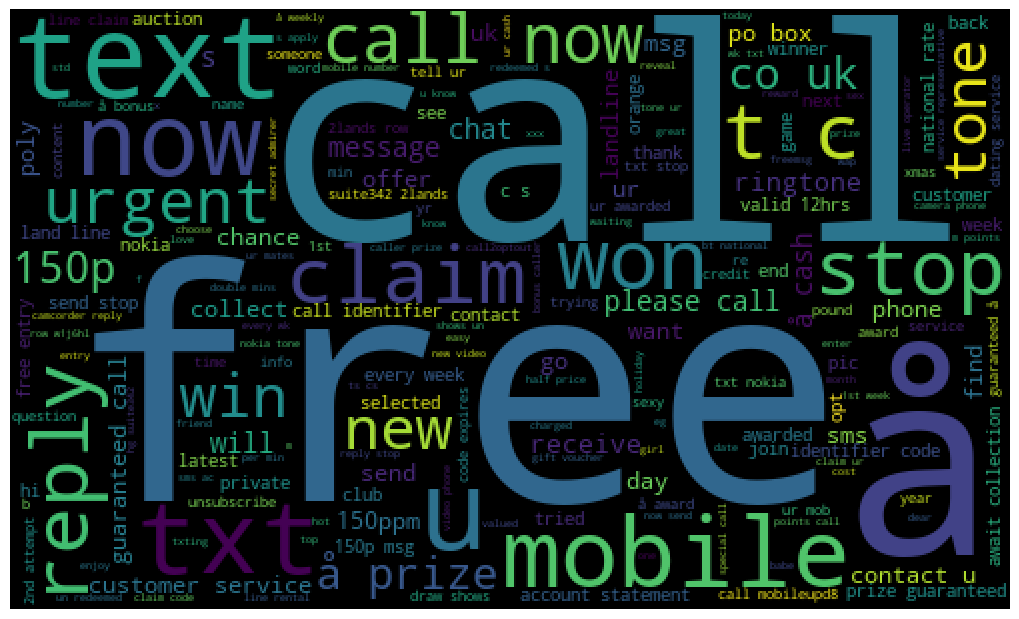

In [29]:
#Spam Word cloud
plt.figure( figsize=(10,8), facecolor='w')
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

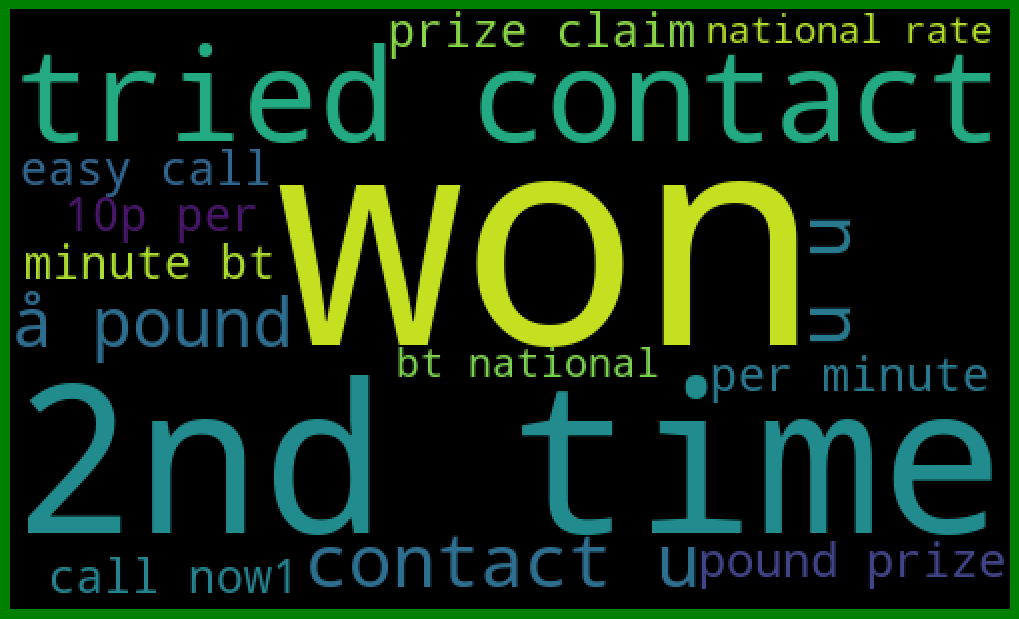

In [30]:
#Creating Ham wordcloud
plt.figure( figsize=(10,8), facecolor='g')
plt.imshow(ham_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [31]:
data = data.replace(['ham','spam'],[0, 1]) 

In [40]:
data.head(10)

,label,text
0,0,Go jurong point crazy Available bugis n great ...
1,0,Ok lar Joking wif u oni
2,1,Free entry 2 wkly comp win FA Cup final tkts 2...
3,0,U dun say early hor U c already say
4,0,Nah dont think goes usf lives around though
5,1,FreeMsg Hey darling 3 weeks word back Id like ...
6,0,Even brother like speak treat like aids patent
7,0,per request Melle Melle Oru Minnaminunginte Nu...
8,1,WINNER valued network customer selected receiv...
9,1,mobile 11 months U R entitled Update latest co...


Punctuation and stop words do not contribute anything to our model, so we have to remove them. Using NLTK library we can easily do it.



## Removing Stopwords from the messages
Stop words are the words in a stop list (or stoplist or negative dictionary) which are filtered out (i.e. stopped) before or after processing of natural language data (text) because they are insignificant.[1] There is no single universal list of stop words used by all natural language processing tools, nor any agreed upon rules for identifying stop words, and indeed not all tools even use such a list. Therefore, any group of words can be chosen as the stop words for a given purpose. The "general trend in [information retrieval] systems over time has been from standard use of quite large stop lists (200–300 terms) to very small stop lists (7–12 terms) to no stop list whatsoever"

In [48]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/giando/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Remove punctuation and stopwords

In [90]:
#remove the punctuations and stopwords
import string
def text_process(text):
    
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = [word for word in text.split() if word.lower() not in stopwords.words('english')]
    
    return " ".join(text)

In [122]:
data['text'] = data['text'].apply(text_process)

In [123]:
data.head()

,label,text
0,ham,Go jurong point crazy Available bugis n great ...
1,ham,Ok lar Joking wif u oni
2,spam,Free entry 2 wkly comp win FA Cup final tkts 2...
3,ham,U dun say early hor U c already say
4,ham,Nah dont think goes usf lives around though


In [52]:
text = pd.DataFrame(data['text'])
label = pd.DataFrame(data['label'])
label

,label
0,ham
1,ham
2,spam
3,ham
4,ham
...,...
5567,spam
5568,ham
5569,ham
5570,ham


## Converting words to vectors
we can convert words to vectors using either **Count Vectorizer** or by using **TF-IDF Vectorizer**.

TF-IDF is better than Count Vectorizers because it not only focuses on the frequency of words present in the corpus but also provides the importance of the words.

We can then remove the words that are less important for analysis, hence making the model building less complex by reducing the input dimensions.

We have included both methods for your reference.

## Converting words to vectors using count vectorizer

1. Count Vectorizers:
Count Vectorizers, one of the most fundamental numerical representations of words.
The Count Vectorizer transforms a string into a Frequency representation. The text is tokenized and very rudimentary processing is performed.
The objective is to make a vector with as many dimensions as there are distinct words. Each unique word has its own dimension, which will be represented by 1 in that dimension and 0 in all others.



text = \[‘Hello my name is james’, 

 ‘james this is my python notebook’,
 
 ‘james trying to create a big dataset’,
 
 ‘james of words to try differnt’,
 
 ‘features of count vectorizer’]


![image.png](./fig/count-vectorizer.png)

In [51]:
text

,text
0,Go jurong point crazy Available bugis n great ...
1,Ok lar Joking wif u oni
2,Free entry 2 wkly comp win FA Cup final tkts 2...
3,U dun say early hor U c already say
4,Nah dont think goes usf lives around though
...,...
5567,2nd time tried 2 contact u U å£750 Pound prize...
5568,Ì b going esplanade fr home
5569,Pity mood Soany suggestions
5570,guy bitching acted like id interested buying s...


In [60]:
type(total_counts)

collections.Counter

## New data type: the Counter
class collections.Counter
A Counter is a dict subclass for counting hashable objects. It is a collection where elements are stored as dictionary keys and their counts are stored as dictionary values. Counts are allowed to be any integer value including zero or negative counts. The Counter class is similar to bags or multisets in other languages.



In [13]:
## Counting how many times a word appears in the dataset

from collections import Counter

total_counts = Counter()
for i in range(len(text)):
    for word in text.values[i][0].split(" "):
        total_counts[word] += 1

print("Total words in data set: ", len(total_counts))

Total words in data set:  11305


In [14]:
total_counts.keys()

dict_keys(['Go', 'jurong', 'point', 'crazy', 'Available', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'Cine', 'got', 'amore', 'wat', 'Ok', 'lar', 'Joking', 'wif', 'u', 'oni', 'Free', 'entry', '2', 'wkly', 'comp', 'win', 'FA', 'Cup', 'final', 'tkts', '21st', 'May', '2005', 'Text', '87121', 'receive', 'questionstd', 'txt', 'rateTCs', 'apply', '08452810075over18s', 'U', 'dun', 'say', 'early', 'hor', 'c', 'already', 'Nah', 'dont', 'think', 'goes', 'usf', 'lives', 'around', 'though', 'FreeMsg', 'Hey', 'darling', '3', 'weeks', 'word', 'back', 'Id', 'like', 'fun', 'still', 'Tb', 'ok', 'XxX', 'std', 'chgs', 'send', 'å£150', 'rcv', 'Even', 'brother', 'speak', 'treat', 'aids', 'patent', 'per', 'request', 'Melle', 'Oru', 'Minnaminunginte', 'Nurungu', 'Vettam', 'set', 'callertune', 'Callers', 'Press', '9', 'copy', 'friends', 'Callertune', 'WINNER', 'valued', 'network', 'customer', 'selected', 'receivea', 'å£900', 'prize', 'reward', 'claim', 'call', '09061701461', 'Claim', 'code', 'KL341',

In [15]:
total_counts['u']

778

In [16]:
# Sorting in decreasing order (Word with highest frequency appears first)
vocab = sorted(total_counts, key=total_counts.get, reverse=True)
print(vocab[:60])

['u', '2', 'call', 'U', 'get', 'Im', 'ur', '4', 'ltgt', 'know', 'go', 'like', 'dont', 'come', 'got', 'time', 'day', 'want', 'Ill', 'lor', 'Call', 'home', 'send', 'going', 'one', 'need', 'Ok', 'good', 'love', 'back', 'n', 'still', 'text', 'im', 'later', 'see', 'da', 'ok', 'think', 'Ì', 'free', 'FREE', 'r', 'today', 'Sorry', 'week', 'phone', 'mobile', 'cant', 'tell', 'take', 'much', 'night', 'way', 'Hey', 'reply', 'work', 'make', 'give', 'new']


In [17]:
type(vocab)

list

In Python, enumerate() is a built-in function that allows you to iterate over a sequence (such as a list, tuple, or string) and keep track of the index of the current item. The enumerate() function takes an iterable as its argument and returns an iterator that produces tuples containing the index and value of each item in the iterable.

In [18]:
# Mapping from words to index

vocab_size = len(vocab)
word2idx = {}
#print vocab_size
for i, word in enumerate(vocab):
    #print(i,word)
    word2idx[word] = i

In [123]:
word2idx['free']

40

In [19]:
# Text to Vector
def text_to_vector(text):
    word_vector = np.zeros(vocab_size)
    for word in text.split(" "):
        if word2idx.get(word) is None:
            continue
        else:
            word_vector[word2idx.get(word)] += 1
    return np.array(word_vector)

In [20]:
# Convert all titles to vectors
word_vectors = np.zeros((len(text), len(vocab)), dtype=np.int_)
for i, (_, text_) in enumerate(text.iterrows()):
    word_vectors[i] = text_to_vector(text_[0])
word_vectors.shape

(5572, 11305)

In [21]:
word_vectors[word_vectors>1]

array([2, 2, 2, ..., 2, 2, 2])

## Converting words to vectors using TF-IDF Vectorizer
From Wikipedia: In information retrieval, tf–idf (also TF*IDF, TFIDF, TF–IDF, or Tf–idf), short for term frequency–inverse document frequency, is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus. It is often used as a weighting factor in searches of information retrieval, text mining, and user modeling. The tf–idf value increases proportionally to the number of times a word appears in the document and is offset by the number of documents in the corpus that contain the word, which helps to adjust for the fact that some words appear more frequently in general. tf–idf has been one of the most popular term-weighting schemes. A survey conducted in 2015 showed that 83% of text-based recommender systems in digital libraries use tf–idf.
![image.png](./fig/tf-idf.png)

The output of the above code will be a matrix of shape (n, m) and the matrix itself will contain the TF-IDF values for each word in each document.


Per utilizzare la tecnica TF-IDF (Term Frequency-Inverse Document Frequency) per la vettorizzazione di un insieme di documenti, puoi seguire i seguenti passi:

- Preprocessare i documenti: Rimuovi le stop words, la punteggiatura, le parole che compaiono raramente e le parole che non portano significato al testo. Inoltre, effettua la lemmatizzazione o lo stemming per ridurre le parole a una forma base comune.
- Creare la matrice TF-IDF: Per ogni termine (parola) in tutti i documenti, calcolare la frequenza del termine in ogni documento (TF) e il suo valore IDF. TF-IDF è il prodotto tra la frequenza del termine nel documento e il suo valore IDF.

- Normalizzare la matrice: Puoi utilizzare la normalizzazione L2 per ottenere una rappresentazione normalizzata delle matrici TF-IDF.

- Usare la matrice come rappresentazione vettoriale: Ogni documento è rappresentato come un vettore, dove ogni dimensione corrisponde a un termine e il valore della dimensione è il valore TF-IDF del termine nel documento.

In [94]:
# Un esempio
from sklearn.feature_extraction.text import TfidfVectorizer

# Esempio di insieme di documenti in formato testuale
documents = ['Questo è il primo documento.', \
             'Questo documento è il secondo documento.', \
             'E questo è il terzo documento.', \
             'È questo il primo documento?']

# Creare un oggetto TfidfVectorizer
vectorizer = TfidfVectorizer()

# Calcolare la matrice TF-IDF a partire dagli insiemi di documenti
tfidf_matrix = vectorizer.fit_transform(documents)

# Stampare la matrice TF-IDF
print(tfidf_matrix.toarray())
# sulle righe abbiamo il vettore

[[0.43508727 0.43508727 0.657341   0.43508727 0.         0.        ]
 [0.64308448 0.32154224 0.         0.32154224 0.61616842 0.        ]
 [0.38713857 0.38713857 0.         0.38713857 0.         0.74187006]
 [0.43508727 0.43508727 0.657341   0.43508727 0.         0.        ]]


Vediamo ora il caso dei nostri sms

In [96]:
data['text']

0       Go jurong point crazy Available bugis n great ...
1                                 Ok lar Joking wif u oni
2       Free entry 2 wkly comp win FA Cup final tkts 2...
3                     U dun say early hor U c already say
4             Nah dont think goes usf lives around though
                              ...                        
5567    2nd time tried 2 contact u U å£750 Pound prize...
5568                          Ì b going esplanade fr home
5569                          Pity mood Soany suggestions
5570    guy bitching acted like id interested buying s...
5571                                       Rofl true name
Name: text, Length: 5572, dtype: object

In [124]:
#convert the text data into vectors
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(data['text'])
vectors.shape

(5572, 9376)

Take care the vectors is of type csr_matrix


In [98]:

type(vectors)

scipy.sparse.csr.csr_matrix

cosa è una csr matrix in python (PERPLEXITY)

Una CSR matrix in Python è una matrice sparsa rappresentata in formato Compressed Sparse Row (CSR). In una matrice sparsa, la maggior parte degli elementi ha valore 0, quindi è inefficiente rappresentarla come una matrice densa. La rappresentazione CSR memorizza solo i valori non nulli e le loro posizioni, risparmiando spazio di memoria.

In Python, la funzione csr_matrix() del modulo scipy.sparse viene utilizzata per creare una matrice sparsa in formato CSR. La rappresentazione CSR memorizza una matrice sparsa m x n in forma di riga compressa utilizzando tre array unidimensionali (V, COL_INDEX, ROW_INDEX). V contiene i valori non nulli della matrice, COL_INDEX contiene gli indici di colonna corrispondenti ai valori non nulli e ROW_INDEX contiene gli indici di riga corrispondenti ai valori non null

Vediamo un esempio

In [30]:
from scipy.sparse import csr_matrix
csr_matrix((3, 4), dtype=np.int8).toarray()

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]], dtype=int8)

In [116]:
row = np.array([0, 0, 1, 2, 2, 2]) # indice delle righe su cui mettere un valore
col = np.array([0, 2, 2, 0, 1, 2]) # indice delle colonne su cui mettere un valore
data1 = np.array([1, 2, 3, 4, 5, 6]) # valori della matrice
a = csr_matrix((data1, (row, col)), shape=(5, 5)).toarray()
a

array([[1, 0, 2, 0, 0],
       [0, 0, 3, 0, 0],
       [4, 5, 6, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]])

Vediamo ora la nostra matrice dei vettori degli sms

In [112]:
vect_array= vectors.toarray()
vect_array[vect_array>0]

array([0.34544531, 0.26268322, 0.32976489, ..., 0.48839169, 0.68887312,
       0.53565602])

In [113]:
vectors

<5572x9376 sparse matrix of type '<class 'numpy.float64'>'
	with 47254 stored elements in Compressed Sparse Row format>

In [125]:
#features = word_vectors
features = vectors

## Splitting into training and test set
In machine learning, we use a test set to evaluate the performance of a trained model on unseen data. A test set is a subset of data that is separate from the training set and is used to test the model after it has been trained on the training set. The purpose of using a test set is to estimate the performance of the model on new, unseen data. By evaluating the model on a test set, we can get an estimate of how well the model will perform on new data and whether it is overfitting or underfitting the training data. In supervised machine learning tasks, it is common to split the data into three independent sets: a training set, a testing set, and a validation set

In [137]:
#split the dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(features, data['label'], test_size=0.15, random_state=111)

In [127]:
X_train.shape

(4736, 9376)

## Classifying using Logistic Regression

In [141]:
#import sklearn packages for building classifiers
from sklearn.linear_model import LogisticRegression
lrc = LogisticRegression(solver='liblinear', penalty='l1')

Facciamo prima il training

In [144]:
lrc.fit(X_train, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

Facciamo ora la prediction (notare usiamo X_test)

In [180]:
# così abbiamo direttamente la prediction della classe
y_pred = lrc.predict(X_test)
y_pred

array(['ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam',
       'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'spam', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham',
       'ham

In [172]:
# con la logistic regression abbiamo anche la prediction della probabilità di appartenenza alla classe
y_pred_prob = lrc.predict_proba(X_test)

In [181]:
y_pred_prob

array([[0.9539888 , 0.0460112 ],
       [0.9972007 , 0.0027993 ],
       [0.9539888 , 0.0460112 ],
       ...,
       [0.14451731, 0.85548269],
       [0.9539888 , 0.0460112 ],
       [0.97527687, 0.02472313]])

## Checking Classification Results with Confusion Matrix

In [194]:
y_test

2291    ham
3384    ham
1192    ham
1134    ham
1310    ham
       ... 
218     ham
4841    ham
84      ham
3735    ham
2899    ham
Name: label, Length: 836, dtype: object

In [197]:
y_pred

array(['ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam',
       'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'spam', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham',
       'ham

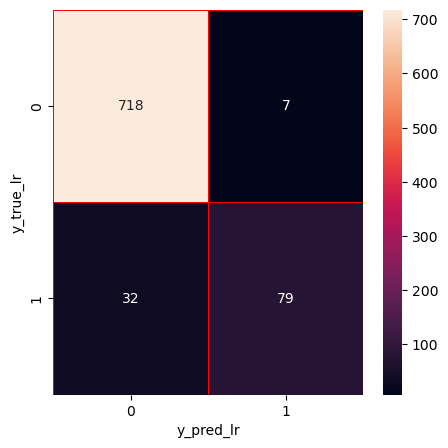

ValueError: pos_label=1 is not a valid label. It should be one of ['ham', 'spam']

In [203]:
from sklearn.metrics import confusion_matrix, classification_report, \
precision_score,recall_score, accuracy_score,f1_score, roc_auc_score, auc
import seaborn as sns
y_pred_lr = y_pred
y_true_lr = y_test
cm = confusion_matrix(y_true_lr, y_pred_lr)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred_lr")
plt.ylabel("y_true_lr")
plt.show()
accuracy_score(y_test , y_pred)
#precision_score(y_test.values , y_pred)
#print('Precision = {0:5.4f}'.format(precision_score(y_test.values , y_pred)))
print('Recall= {0:5.4f}'.format(recall_score(y_test , y_pred)))
#print('F1-score= {0:5.4f}'.format(f1_score(y_test , y_pred)))
print('Accuracy = {0:5.4f}'.format(accuracy_score(y_test , y_pred)))


Proviamo a fare una prediction su un nuovo messaggio

In [148]:
#write functions to detect if the message is spam or not
def find(x):
    if x == 1:
        print ("Message is SPAM")
    else:
        print ("Message is NOT Spam")

In [158]:
# creiamo il nuovo messaggio
newtext = ["Free entry"]
# vettorizziamo il messaggio
newtext_vector = vectorizer.transform(newtext)

In [159]:
newtext_vector.toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])

Ora facciamo la prediction

In [162]:
lrc.predict(newtext_vector)

array(['ham'], dtype=object)

In [161]:
x = lrc.predict(newtext_vector)
x

array(['ham'], dtype=object)

In [204]:
find(x)      

Message is NOT Spam


In [205]:
#import sklearn packages for building classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
#initialize multiple classification models 
lrc = LogisticRegression(solver='liblinear', penalty='l1')
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier(n_neighbors=49)
mnb = MultinomialNB(alpha=0.2)
dtc = DecisionTreeClassifier(min_samples_split=7, random_state=111)
rfc = RandomForestClassifier(n_estimators=31, random_state=111)

In [206]:
#create a dictionary of variables and models
clfs = {'SVC' : svc,'KN' : knc, 'NB': mnb, 'DT': dtc, 'LR': lrc, 'RF': rfc}

In [207]:
#fit the data onto the models
def train(clf, features, targets):    
    clf.fit(features, targets)

def predict(clf, features):
    return (clf.predict(features))

In [208]:
pred_scores_word_vectors = []
for k,v in clfs.items():
    train(v, X_train, y_train)
    pred = predict(v, X_test)
    pred_scores_word_vectors.append((k, [accuracy_score(y_test , pred)]))

## Predictions using TFIDF Vectorizer algorithm

In [209]:
pred_scores_word_vectors

[('SVC', [0.9784688995215312]),
 ('KN', [0.9330143540669856]),
 ('NB', [0.9880382775119617]),
 ('DT', [0.9605263157894737]),
 ('LR', [0.9533492822966507]),
 ('RF', [0.9796650717703349])]

## Model predictions

In [213]:
#write functions to detect if the message is spam or not
def find(x):
    if x == 1:
        print ("Message is SPAM")
    else:
        print ("Message is NOT Spam")

In [211]:
newtext = ["Free entry"]
integers = vectorizer.transform(newtext)

In [214]:
x = mnb.predict(integers)
find(x)        

Message is NOT Spam


/tmp/ipykernel_93823/579331721.py:3: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if x == 1:


## Checking Classification Results with Confusion Matrix

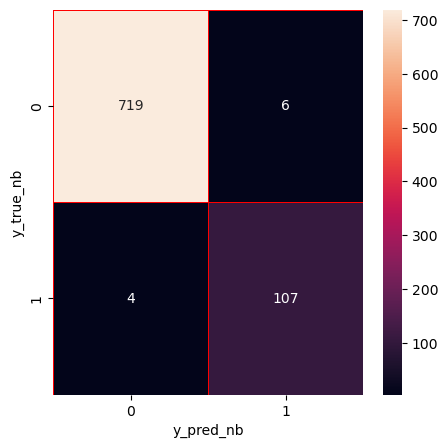

In [215]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Naive Bayes
y_pred_nb = mnb.predict(X_test)
y_true_nb = y_test
cm = confusion_matrix(y_true_nb, y_pred_nb)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred_nb")
plt.ylabel("y_true_nb")
plt.show()